BINARY SVM

Import libraries

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

Load data

The diabetes.csv dataset often refers to the Pima Indians Diabetes Database, which contains personal and health-related information about female patients of Pima Indian heritage. Its goal is to predict the likelihood of diabetes onset based on various diagnostic measurements. Common features include:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration

BloodPressure: Diastolic blood pressure

SkinThickness: Triceps skinfold thickness

Insulin: Serum insulin level

BMI: Body mass index

DiabetesPedigreeFunction: Diabetes pedigree function (genetic predisposition)

Age: Patient’s age

Outcome: Target variable (0 – non-diabetic, 1 – diabetic)

In [306]:
data = pd.read_csv('./diabetes.csv')

In [307]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [309]:
X = data.drop(columns='Outcome')
y = data['Outcome']
print(X.shape)
print(y.shape)

(768, 8)
(768,)


Train test split

In [310]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


Data processing


In [275]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('X_train\n', X_train)
print('X_test\n', X_test)


X_train
 [[-0.8362943  -0.80005088 -0.53576428 ... -1.06015343 -0.61421636
  -0.94861028]
 [ 0.39072767 -0.49054341  0.12804365 ...  0.64646721 -0.90973787
  -0.43466673]
 [-1.14304979  0.43797901 -0.09322566 ...  1.35537117 -0.30699103
  -0.77729576]
 ...
 [ 1.92450513 -0.6143464   0.90248622 ...  1.78859026  1.94892066
   0.42190587]
 [-1.14304979  0.62368349 -3.8548039  ...  1.36849903 -0.77514391
  -0.34900947]
 [-1.14304979  0.12847154  1.45565949 ... -1.24394334 -0.60836445
  -1.03426754]]
X_test
 [[ 0.69748316 -0.70719864 -0.64639893 ...  0.26575953 -0.11680393
   0.85019217]
 [-0.52953881 -0.27388818  0.29399563 ...  0.488933   -0.94192338
  -1.03426754]
 [-0.52953881 -0.39769117 -0.31449497 ... -0.1543317  -0.91266382
  -1.03426754]
 ...
 [-1.14304979  0.19037303  0.57058226 ...  0.56770011  0.97750343
  -0.86295302]
 [ 0.69748316 -0.49054341  0.01740899 ... -0.1543317  -1.01799822
   0.33624861]
 [ 0.39072767 -1.35716433  0.68121692 ...  0.50206085 -0.91851573
   0.16493409]]

Model

In [276]:
#define kernels
def linear_kernel(x, y):
    return np.dot(x, y.T)

def rbf_kernel(x, y, gamma=0.5):
    sq_dist = np.sum((x[:, np.newaxis] - y) ** 2, axis=2)
    return np.exp(-gamma * sq_dist)

def sigmoid_kernel(x, y, gamma=1, C=0):
    return np.tanh(gamma * np.dot(x, y.T) + C)

def polynomial_kernel(x, y, gamma=1, C=1, degree=1):
    return (gamma * np.dot(x, y.T) + C) ** degree

In [277]:
#Build SVM model using kernels
class SVM:
    def __init__(self, no_of_iterations=1000, lambda_para=0.1, learning_rate=0.01, kernel_func=linear_kernel, **kernel_params):
        self.no_of_iterations = no_of_iterations
        self.lambda_para = lambda_para
        self.learning_rate = learning_rate
        self.kernel_func = kernel_func
        self.kernel_params = kernel_params

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m, self.n = X.shape
        self.alpha = np.zeros(self.m)  
        self.b = 0
        y_label = np.where(y == 0, -1, 1)

        K = self.kernel_func(self.X, self.X, **self.kernel_params)

        for _ in range(self.no_of_iterations):
            for i in range(self.m):
                kernel_value = np.sum(self.alpha * y_label * K[:, i]) + self.b
                if y_label[i] * kernel_value < 1:
                    dalpha = (1 - y_label[i] * kernel_value) - 2 * self.lambda_para * self.alpha[i]
                    self.alpha[i] += self.learning_rate * dalpha
                    self.b += self.learning_rate * y_label[i]
                else:
                    self.alpha[i] -= self.learning_rate * 2 * self.lambda_para * self.alpha[i]

    def predict(self, X):
        K = self.kernel_func(X, self.X, **self.kernel_params)
        y_label = np.where(self.y == 0, -1, 1)
        output = np.sum(self.alpha * y_label * K, axis=1) + self.b
        return np.where(output > 0, 1, 0)

In [278]:
#define kernels
kernels = {
    'linear': linear_kernel,
    'rbf' : rbf_kernel,
    'polynomial': polynomial_kernel,
    'sigmoid': sigmoid_kernel
}

In [279]:
#define parameters
gamma = [1, 0.1, 0.01, 0.001]
C = [0.1,1,10,100]
degree = [1,2,3]

In [280]:
#define hyperparameters
rbf_hyperpara = {
    'gamma' : gamma
} 

polynomial_hyperpara = {
    'gamma' : gamma,
    'C' : C,
    'degree' : degree
}

sigmoid_hyperpara = {
    'gamma' : gamma,
    'C' : C
}


In [281]:
#Train SVM model
results = []
accuracy_list = []
names = []

for kernel_name, kernel_func in kernels.items():
    if kernel_name == 'linear':
        svm = SVM(1000,0.1, 0.01, kernel_func)

    elif kernel_name == 'rbf':
        grid_search = GridSearchCV(SVC(kernel='rbf'), rbf_hyperpara)
        grid_search.fit(X_train, y_train)
        best_para = grid_search.best_params_
        best_para = list(best_para.values())
        svm = SVM(1000, 0.1, 0.01, kernel_func, gamma = best_para[0])

    elif kernel_name == 'polynomial':
        grid_search = GridSearchCV(SVC(kernel='poly'), polynomial_hyperpara)
        grid_search.fit(X_train, y_train)
        best_para = grid_search.best_params_
        best_para = list(best_para.values())
        svm = SVM(1000, 0.1, 0.01, kernel_func, gamma=best_para[0], C=best_para[1], degree=best_para[2])

    elif kernel_name == 'sigmoid':
        grid_search = GridSearchCV(SVC(kernel='sigmoid'), sigmoid_hyperpara)
        grid_search.fit(X_train, y_train)
        best_para = grid_search.best_params_
        best_para = list(best_para.values())
        svm = SVM(1000,0.1,0.01,kernel_func, gamma=best_para[0], C=best_para[1])

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    results.append(y_pred)
    accuracy = np.mean(np.where(y_pred == y_test, 1, 0))
    accuracy_list.append(accuracy)
    names.append(kernel_name)


Evaluation

In [282]:
def visualize_classification_report(report):
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(10,8))
    sns.heatmap(report_df.iloc[:,:].T, annot=True, cmap='YlGnBu',xticklabels=True, yticklabels=True)
    plt.title('Classification report')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)

In [283]:
def visualize_confusion_matrix(cm, out):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap='coolwarm', annot=True, xticklabels=out, yticklabels=out)
    plt.title('Confusion Matrix', fontsize =20)
    plt.xlabel('Actual', fontsize = 12)
    plt.ylabel('Predicted', fontsize=12)
    plt.show()

Linear


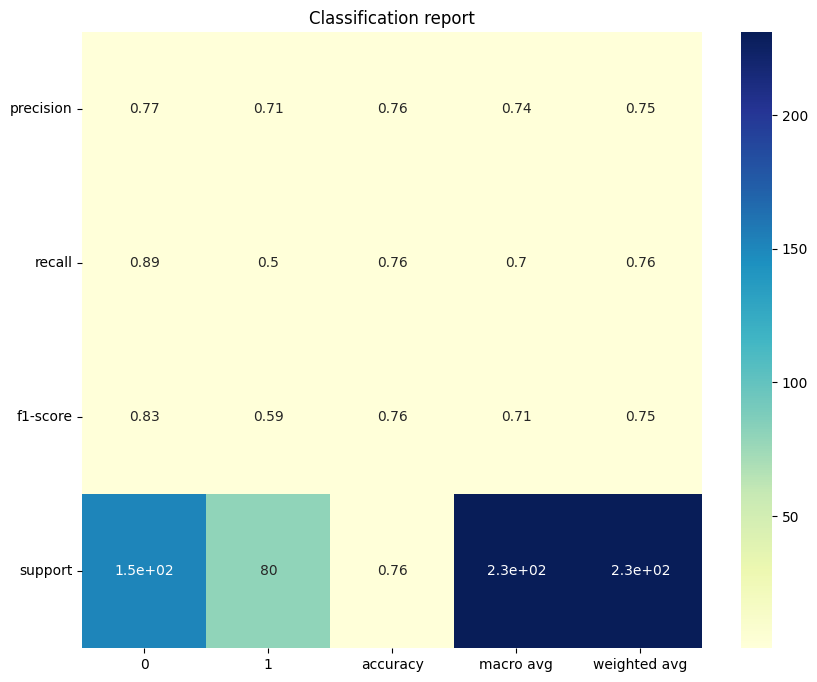

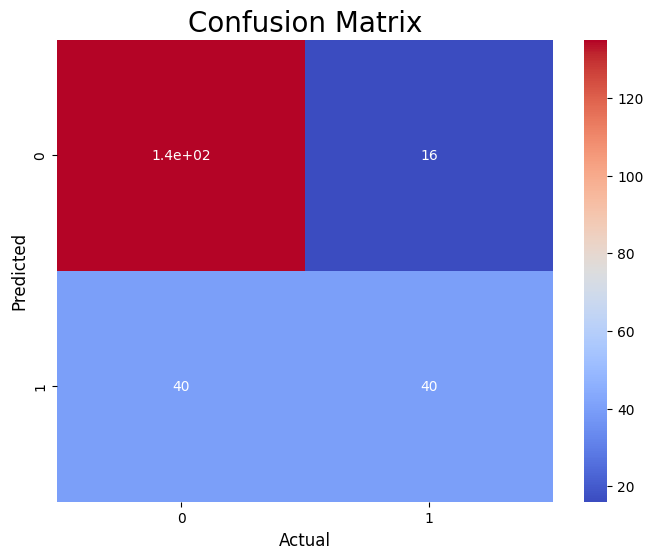

rbf


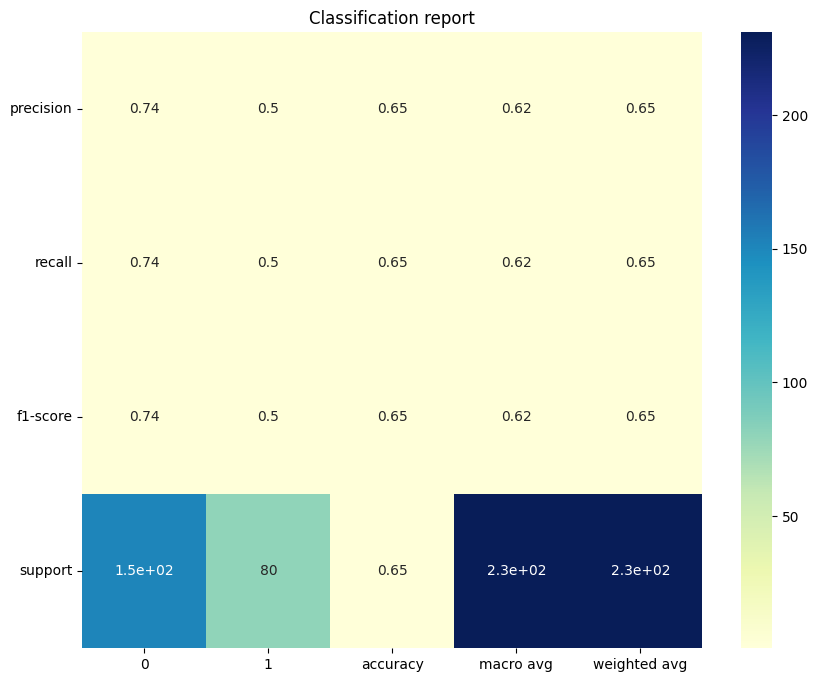

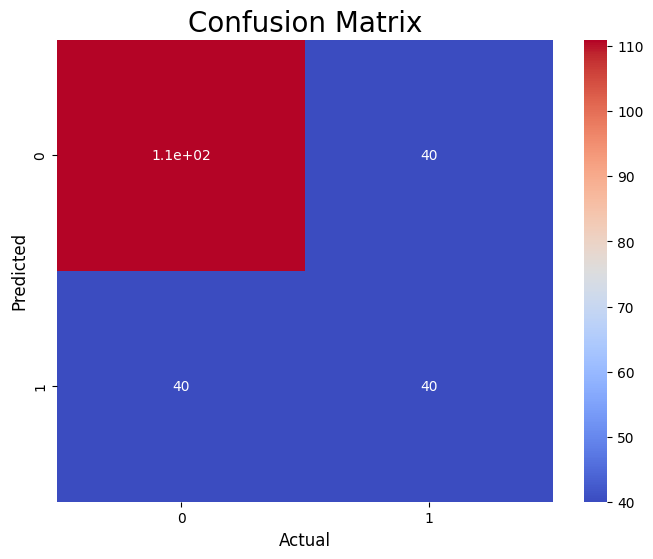

Polynomial


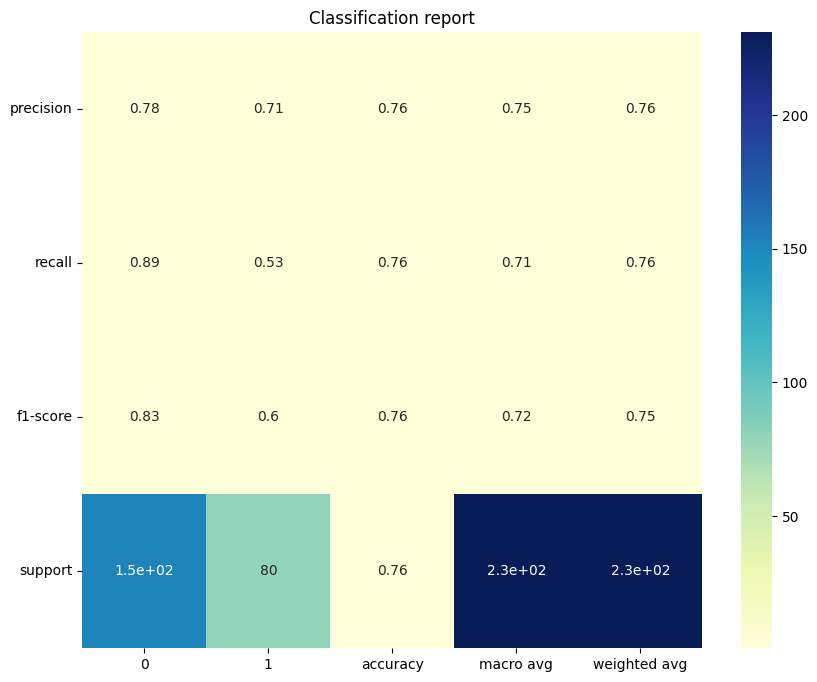

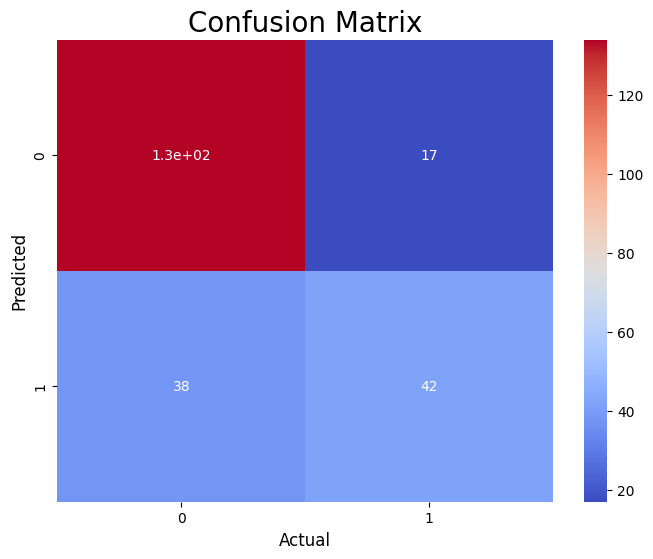

Sigmoid


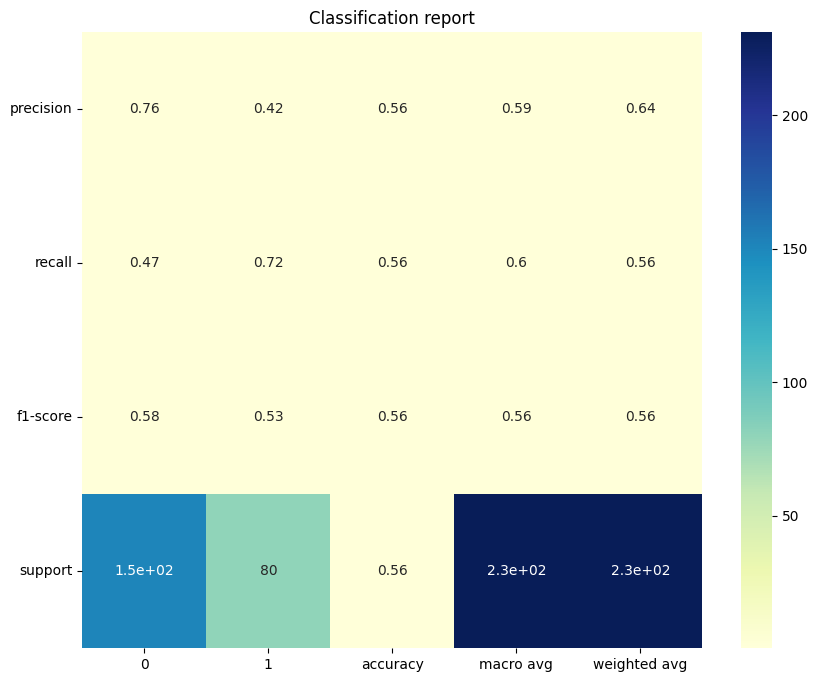

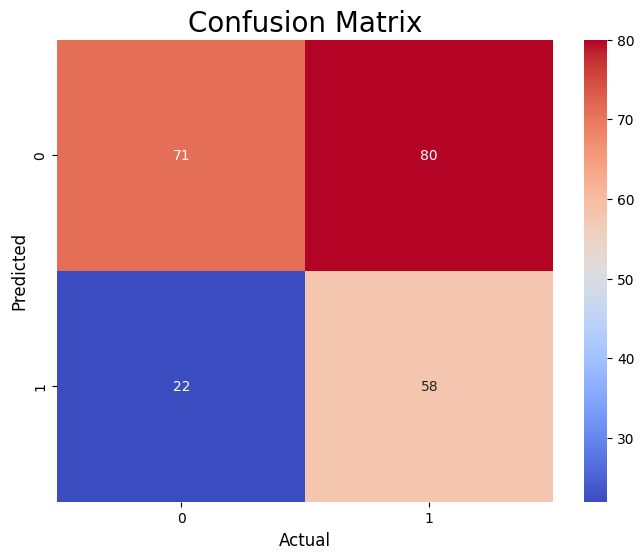

In [284]:
#Evaluate every single kernel (using classfication_report and confusion matrix)
for i in range(len(results)):
    if i==0: 
        print('Linear')
    elif i==1:
        print('rbf')
    elif i==2:
        print('Polynomial')
    else:
        print('Sigmoid')
    accuracy = metrics.accuracy_score(y_test, results[i])
    report = classification_report(y_test, results[i], output_dict=True)
    cm = confusion_matrix(y_test, results[i])
    visualize_classification_report(report)
    visualize_confusion_matrix(cm, out=['0','1'])

In [285]:
def plot_bar_chart(names, accuracy_list):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(names, accuracy_list, color='skyblue')
    plt.title('Compare accuracy score on every single model', fontsize=16)
    plt.xlabel('Name', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.ylim(0, 1)

    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


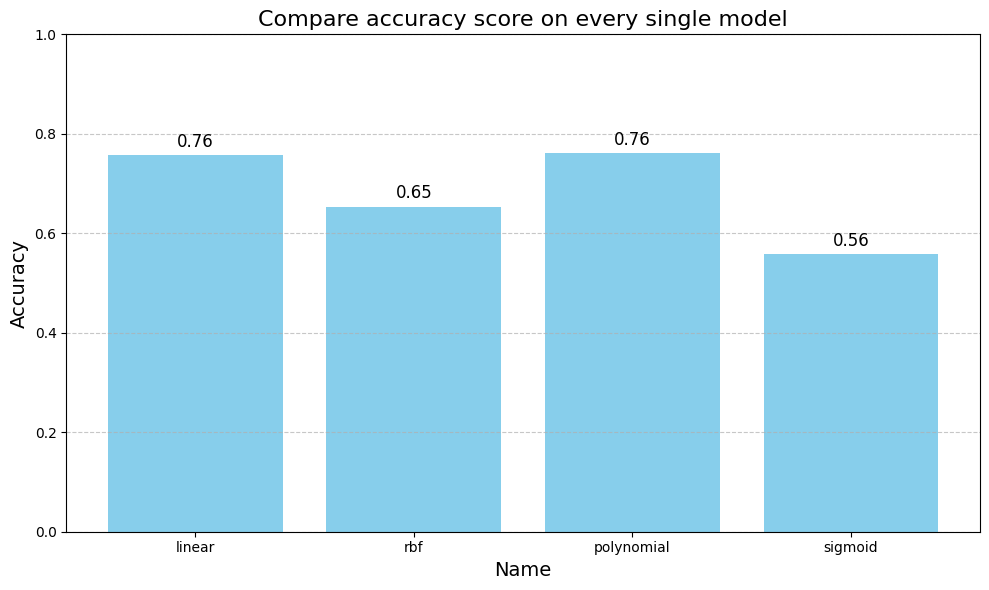

In [286]:
#Compare accuracy score on SVM kernels
plot_bar_chart(names,accuracy_list)

In [ ]:
#Try this dataset with other models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: Accuracy = {accuracy_score(y_test, y_pred):.2f}")
    names.append(name)
    accuracy_list.append(accuracy_score(y_test, y_pred))

Logistic Regression: Accuracy = 0.74
Decision Tree: Accuracy = 0.70
Random Forest: Accuracy = 0.76
KNN: Accuracy = 0.70


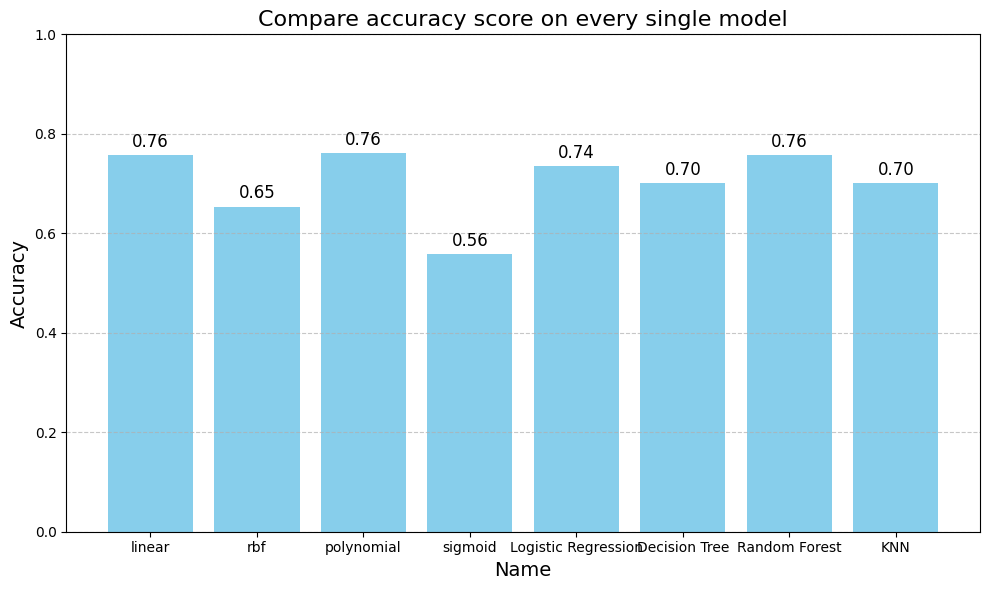

In [288]:
#compare accuracy score on SVM kernels and other models
plot_bar_chart(names, accuracy_list)

MULTICLASS SVM 

Load data

This dataset contains comprehensive information on the air quality and its impact on public health for 5,811 records. It includes variables such as air quality index (AQI), concentrations of various pollutants, weather conditions, and health impact metrics. The target variable is the health impact class, which categorizes the health impact based on the air quality and other related factors.

Table of Contents

    Record Information

    Record ID
    
    Air Quality Metrics
    
    Weather Conditions  

    Health Impact Metrics

Target Variable: Health Impact Class

Record Information

    Record ID
        RecordID: A unique identifier assigned to each record (1 to 2392).
        
    Air Quality Metrics
        AQI: Air Quality Index, a measure of how polluted the air currently is or how polluted it is forecast to become.
        PM10: Concentration of particulate matter less than 10 micrometers in diameter (μg/m³).
        PM2_5: Concentration of particulate matter less than 2.5 micrometers in diameter (μg/m³).
        NO2: Concentration of nitrogen dioxide (ppb).
        SO2: Concentration of sulfur dioxide (ppb).
        O3: Concentration of ozone (ppb).
    
    Weather Conditions
        Temperature: Temperature in degrees Celsius (°C).
        Humidity: Humidity percentage (%).
        WindSpeed: Wind speed in meters per second (m/s).

    Health Impact Metrics
        RespiratoryCases: Number of respiratory cases reported.
        CardiovascularCases: Number of cardiovascular cases reported.
        HospitalAdmissions: Number of hospital admissions reported.
    
    Target Variable: Health Impact Class
        HealthImpactScore: A score indicating the overall health impact based on air quality and other related factor ranging from 0 to 100.
        
        HealthImpactClass: Classification of the health impact based on the health impact score:
        0: 'Very High' (HealthImpactScore >= 80)
        1: 'High' (60 <= HealthImpactScore < 80)
        2: 'Moderate' (40 <= HealthImpactScore < 60)
        3: 'Low' (20 <= HealthImpactScore < 40)
        4: 'Very Low' (HealthImpactScore < 20)

In [312]:
data = pd.read_csv('air_quality_health_impact_data.csv')

In [313]:
data.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [315]:
data.shape

(5811, 15)

In [330]:
target = 'HealthImpactClass'
X = data.drop(columns=['RecordID', 'HealthImpactScore', 'HealthImpactClass'])
X.shape

(5811, 12)

In [331]:
y = data[target]
y.shape

(5811,)

Train test split

In [332]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4067, 12)
(4067,)
(1744, 12)
(1744,)


Data processing

In [333]:
scaler = StandardScaler()

In [334]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.80042716, -1.06033797, -0.10846846, ...,  0.64993604,
        -0.90392424, -1.41682862],
       [ 1.56809092, -0.64597131, -0.84493717, ..., -0.63010748,
        -1.81694047,  0.0075298 ],
       [-0.1425402 ,  0.01323112, -1.42609653, ..., -0.3100966 ,
         0.46560012, -0.70464941],
       ...,
       [ 0.30121698, -0.85714793, -0.59035797, ...,  0.00991428,
         0.92210823,  0.71970901],
       [-1.23652367, -0.3853816 ,  0.3749544 , ..., -1.910151  ,
         2.29163259, -0.70464941],
       [ 0.9671636 ,  1.07562276, -0.96053599, ..., -0.3100966 ,
         0.009092  , -0.70464941]])

In [335]:
X_test = scaler.transform(X_test)
X_test

array([[-0.86405252, -1.14313523, -0.71668187, ..., -1.59014012,
        -0.44741612,  0.0075298 ],
       [ 0.91897939,  1.52569404,  0.61069543, ...,  0.96994692,
        -0.44741612,  2.85624664],
       [ 1.64574561, -0.31571731, -1.45697758, ...,  0.32992516,
         0.92210823,  1.43188822],
       ...,
       [ 1.32824991, -0.12273474, -1.2310879 , ..., -0.3100966 ,
         0.46560012,  0.0075298 ],
       [ 0.5997862 , -1.39533847,  0.6640896 , ...,  0.32992516,
         0.009092  , -0.70464941],
       [-0.0619182 , -1.72264988,  0.20849515, ...,  1.60996868,
        -0.90392424, -1.41682862]])

In [336]:
y_test.value_counts()

HealthImpactClass
0.0    1442
1.0     175
2.0      83
3.0      26
4.0      18
Name: count, dtype: int64

Model

In [337]:
#Build Multiclass SVM model
class SVM:
    def __init__(self, no_of_iterations=1000, lambda_para=0.1, learning_rate=0.01, kernel_func=linear_kernel):
        self.no_of_iterations = no_of_iterations
        self.lambda_para = lambda_para
        self.learning_rate = learning_rate
        self.kernel_func = kernel_func

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.where(np.array(y) == 0, -1, 1)
        self.m, self.n = self.X.shape
        self.alpha = np.zeros(self.m)
        self.b = 0
        K = self.kernel_func(self.X, self.X)

        for _ in range(self.no_of_iterations):
            margin = np.dot(K, self.alpha * self.y) + self.b
            errors = 1 - self.y * margin

            errors = np.clip(errors, -1e6, 1e6)
            active_indices = np.where(errors > 0)[0]
            if len(active_indices) > 0:
                d_alpha = self.learning_rate * (errors[active_indices] - 2 * self.lambda_para * self.alpha[active_indices])
                self.alpha[active_indices] += d_alpha
                self.alpha = np.clip(self.alpha, 0, 1e6)
                self.b += self.learning_rate * np.sum(self.y[active_indices] * errors[active_indices])

    def predict(self, X):
        X = np.array(X)
        K = self.kernel_func(X, self.X)
        decision = np.dot(K, self.alpha * self.y) + self.b
        return np.where(decision > 0, 1, 0)


class MultiClassSVM:
    def __init__(self, no_of_iterations=1000, lambda_para=0.1, learning_rate=0.01, kernel_func=linear_kernel):
        self.no_of_iterations = no_of_iterations
        self.lambda_para = lambda_para
        self.learning_rate = learning_rate
        self.kernel_func = kernel_func
        self.models = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            y_binary = np.where(y == cls, 1, 0)
            model = SVM(self.no_of_iterations, self.lambda_para, self.learning_rate, self.kernel_func)
            model.fit(X, y_binary)
            self.models[cls] = model

    def predict(self, X):
        decision_values = {cls: model.predict(X) for cls, model in self.models.items()}
        predictions = np.array([
            max(decision_values, key=lambda k: decision_values[k][i])
            for i in range(len(X))
        ])
        return predictions


C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

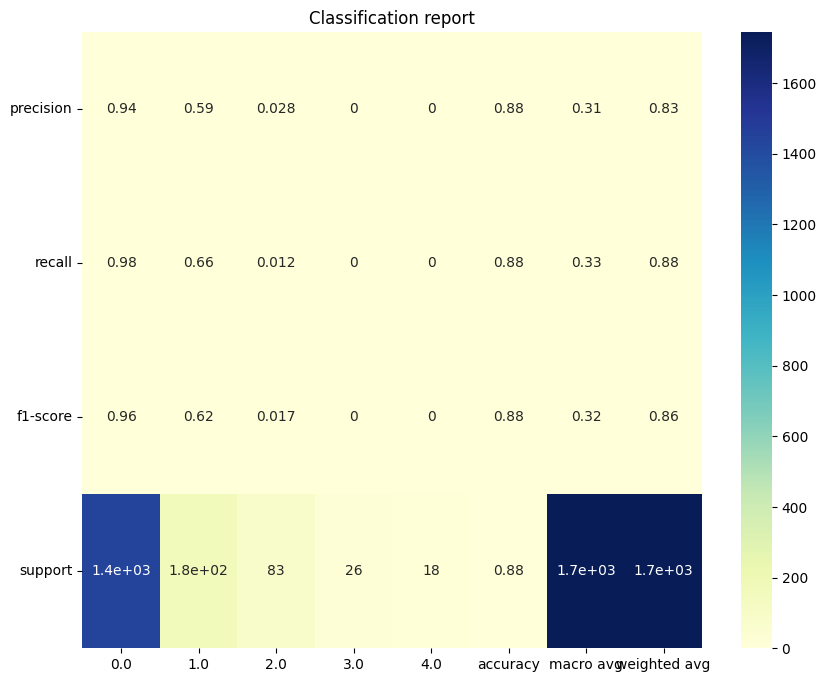

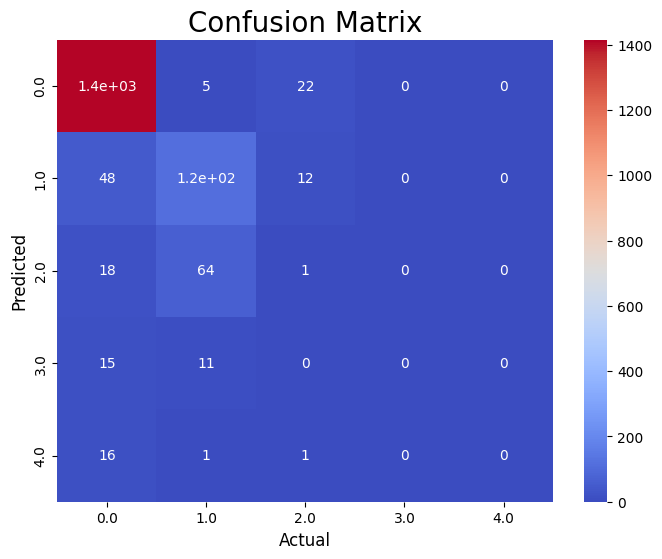

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

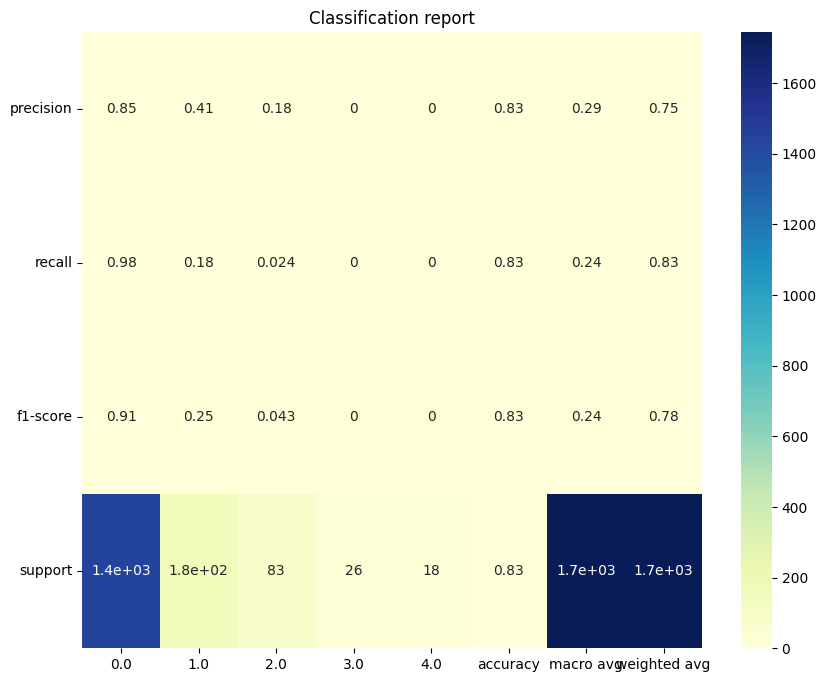

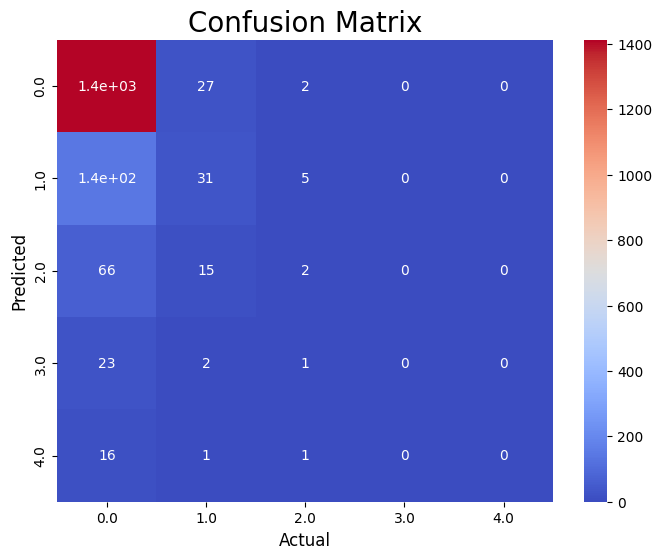

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

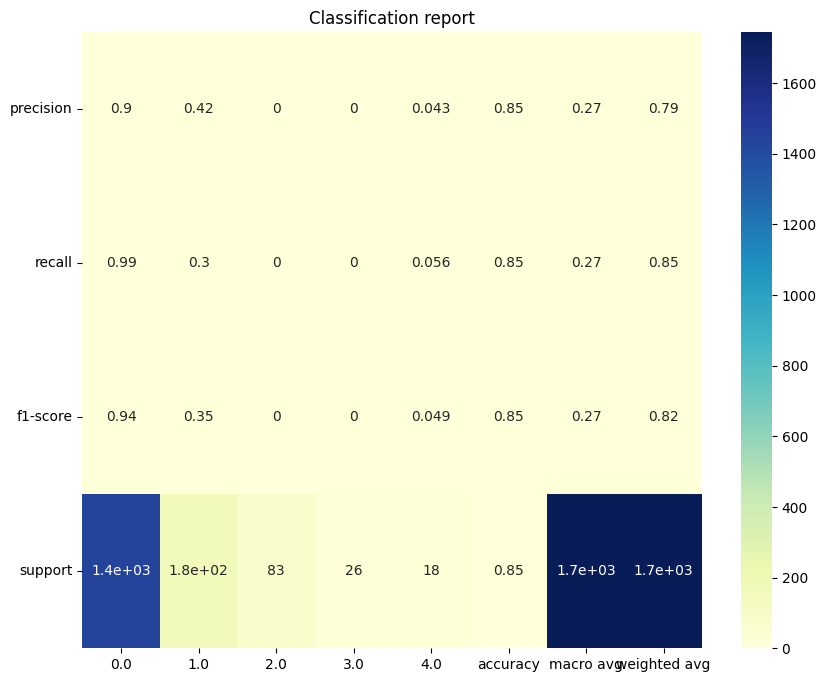

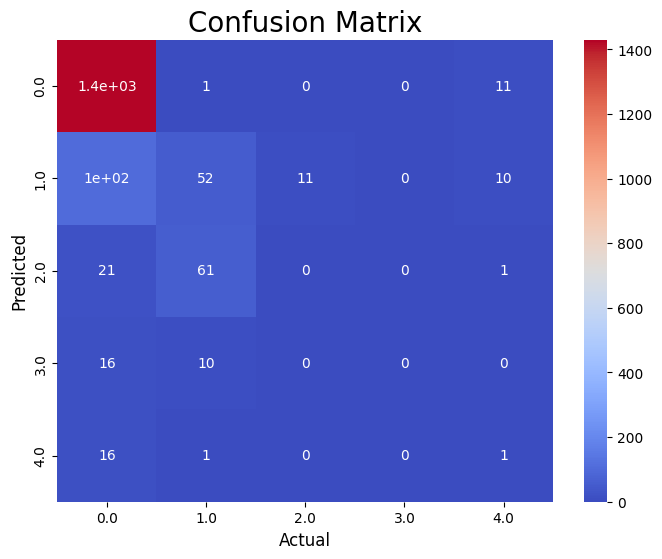

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

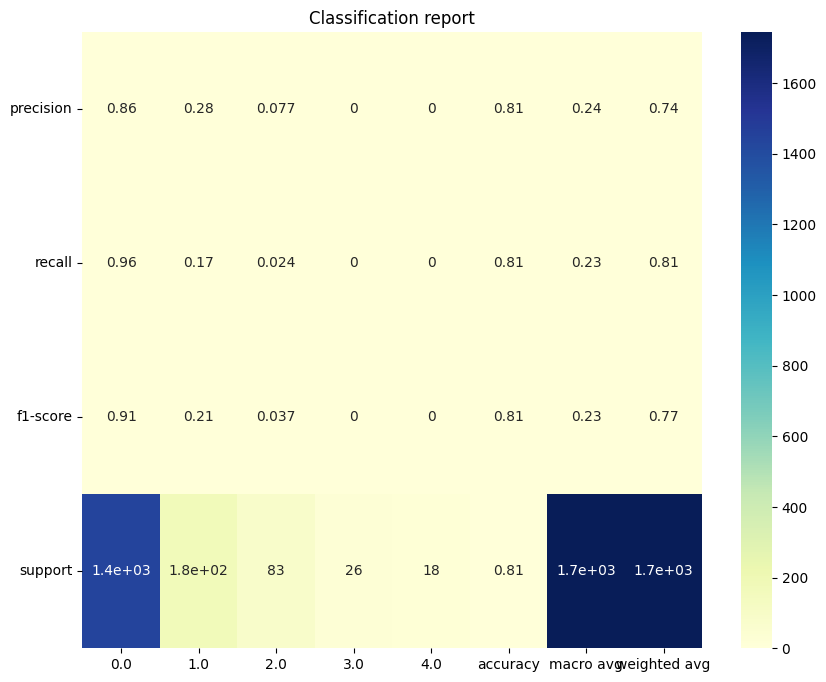

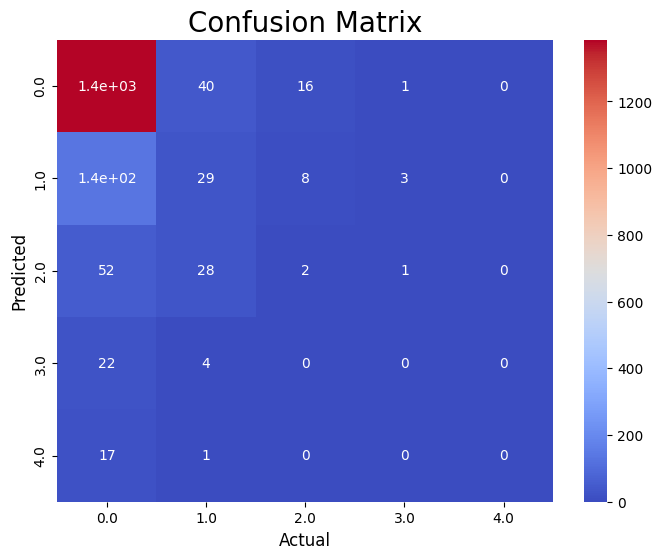

In [338]:
names = []
accuracy_list = []

for kernel_name, kernel_func in kernels.items():
    multi_svm = MultiClassSVM(
        no_of_iterations=1000,
        lambda_para=0.1,
        learning_rate=0.01,
        kernel_func=kernel_func
    )
    multi_svm.fit(X_train, y_train)
    y_pred = multi_svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    names.append(kernel_name)
    accuracy_list.append(accuracy)    
    visualize_classification_report(report)
    visualize_confusion_matrix(cm, out=np.unique(y_test))

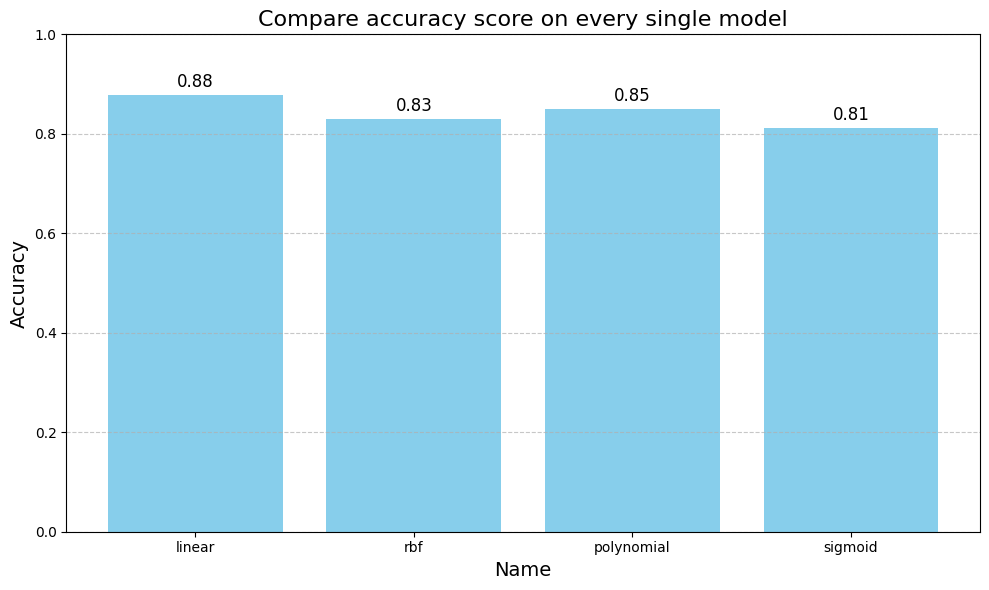

In [339]:
#Compare accuracy score on every single kernel
plot_bar_chart(names, accuracy_list)

In [340]:
#Try this dataset with other models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    names.append(model_name)
    accuracy_list.append(accuracy)


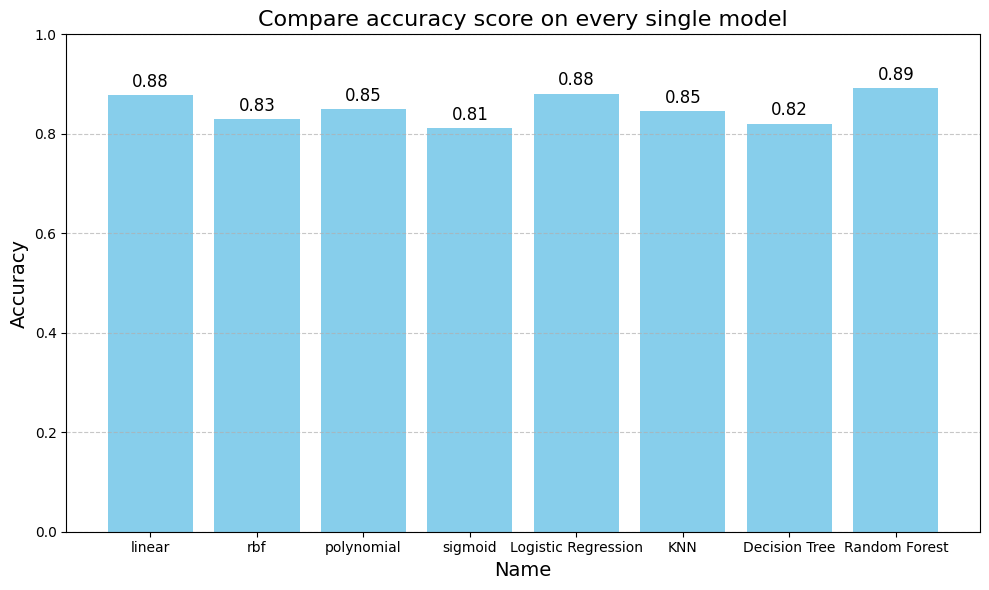

In [341]:
#Compare accuracy score on Multiclass SVM and other models
plot_bar_chart(names, accuracy_list)